In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
df = pd.read_csv("Iris.csv")

# Split features and target
X = df.iloc[:, 1:5]
y = df['Species']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Predict
y_pred = lda.predict(X_test)

Accuracy: 1.0
Predicted Species: Iris-setosa


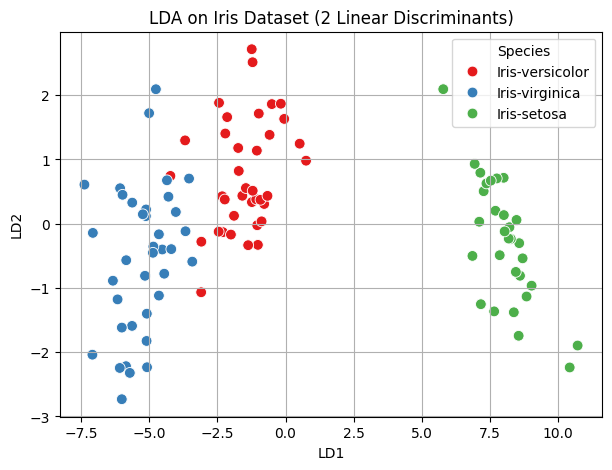

In [29]:
print("Accuracy:", accuracy_score(y_test, y_pred))

# Predict for new flower
sample = pd.DataFrame([[5.1, 4.1, 2.4, 1.2]], columns=X.columns)
predicted = lda.predict(sc.transform(sample))
print("Predicted Species:", predicted[0])

# Visualization of LDA
lda_df = pd.DataFrame(X_train_lda, columns=['LD1', 'LD2'])
lda_df['Species'] = y_train.values

plt.figure(figsize=(7,5))
sns.scatterplot(data=lda_df, x='LD1', y='LD2', hue='Species', palette='Set1', s=60)
plt.title('LDA on Iris Dataset (2 Linear Discriminants)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.grid(True)
plt.show()